In [4]:
#coding:utf-8
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST数据输入

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

# 输入图像大小是 28x28 大小
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

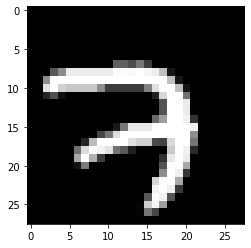

In [7]:
plt.imshow(X_train[0].reshape((28, 28)), cmap='gray')

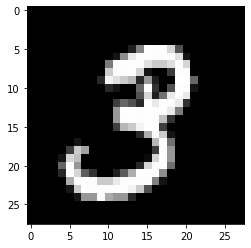

In [8]:
plt.imshow(X_train[1].reshape((28, 28)), cmap='gray')

In [9]:
# Importing the Keras libraries and packages
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [10]:
def build_classifier():

    classifier = Sequential()

    # 第一层 Conv2D，激活函数 Relu
    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu", input_shape = (28, 28, 1)))

    # 第二层 Maxpooling, 使用保持图像大小的 padding
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))

    # 第三层 Dropout
    classifier.add(Dropout(0.5))

    # 第四层 Conv2D，激活函数 Relu
    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu"))

    # 第五层 Maxpoling，使用保持图像大小的 padding
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))

    # 第六层 Dropout
    classifier.add(Dropout(0.5))

    # 第七层 Flatten
    classifier.add(Flatten())

    # 第八层 Dense
    classifier.add(Dense(kernel_initializer="uniform", units = 4))

    # 第九层 softmax 输出
    classifier.add(Dense(kernel_initializer="uniform", units = 10, activation="softmax"))

    #  使用 adam 训练
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

    return classifier

In [11]:
classifier = build_classifier()
classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 2)         38        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 98)              

In [12]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='minions.hdf5', verbose=1, save_best_only=True, monitor='val_loss',mode='min')

history = classifier.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data=(X_test, y_test), callbacks=[checkpointer])


Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 10s 190us/step - loss: 1.5304 - accuracy: 0.4609 - val_loss: 1.0716 - val_accuracy: 0.6750

Epoch 00001: val_loss improved from inf to 1.07164, saving model to minions.hdf5
Epoch 2/50
55000/55000 [==============================] - 8s 143us/step - loss: 1.3127 - accuracy: 0.5415 - val_loss: 1.0144 - val_accuracy: 0.7065

Epoch 00002: val_loss improved from 1.07164 to 1.01443, saving model to minions.hdf5
Epoch 3/50
55000/55000 [==============================] - 8s 137us/step - loss: 1.2210 - accuracy: 0.5801 - val_loss: 0.9363 - val_accuracy: 0.7328

Epoch 00003: val_loss improved from 1.01443 to 0.93629, saving model to minions.hdf5
Epoch 4/50
55000/55000 [==============================] - 9s 161us/step - loss: 1.1383 - accuracy: 0.6064 - val_loss: 0.8688 - val_accuracy: 0.7447

Epoch 00004: val_loss improved from 0.93629 to 0.86881, saving model to minions.hdf5
Epoch 5/50
55000

55000/55000 [==============================] - 12s 209us/step - loss: 1.0106 - accuracy: 0.6564 - val_loss: 0.7530 - val_accuracy: 0.7740

Epoch 00038: val_loss did not improve from 0.74592
Epoch 39/50
55000/55000 [==============================] - 11s 207us/step - loss: 1.0042 - accuracy: 0.6573 - val_loss: 0.7544 - val_accuracy: 0.7675

Epoch 00039: val_loss did not improve from 0.74592
Epoch 40/50
55000/55000 [==============================] - 11s 208us/step - loss: 1.0052 - accuracy: 0.6568 - val_loss: 0.7409 - val_accuracy: 0.7763

Epoch 00040: val_loss improved from 0.74592 to 0.74085, saving model to minions.hdf5
Epoch 41/50
55000/55000 [==============================] - 11s 197us/step - loss: 0.9956 - accuracy: 0.6586 - val_loss: 0.7428 - val_accuracy: 0.7730

Epoch 00041: val_loss did not improve from 0.74085
Epoch 42/50
55000/55000 [==============================] - 11s 205us/step - loss: 0.9974 - accuracy: 0.6603 - val_loss: 0.7221 - val_accuracy: 0.7833

Epoch 00042: val_lo

In [17]:
def plot_history(history) :
    SMALL_SIZE = 20
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    fig = plt.figure()
    fig.set_size_inches(15,10)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'],loc='upper left')
    plt.show()

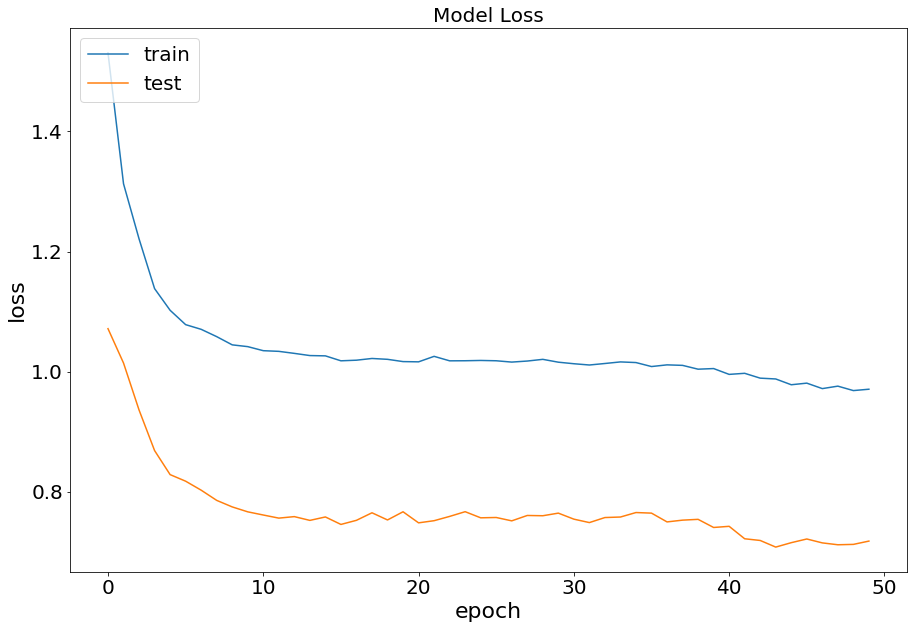

In [18]:
plot_history(history.history)

In [19]:
classifier.save("mnist.h5")

In [20]:
import onnx
import keras2onnx

onnx_model = keras2onnx.convert_keras(classifier, 'mnist')
onnx.save_model(onnx_model, 'mnist.onnx')

In [6]:
import onnxruntime as rt
sess = rt.InferenceSession("mnist.onnx")

AttributeError: module 'onnxruntime' has no attribute 'InferenceSession'

In [5]:
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

NameError: name 'sess' is not defined

In [25]:
res = np.array(sess.run([output_name], {input_name: X_test}))

NameError: name 'sess' is not defined

NameError: name 'res' is not defined

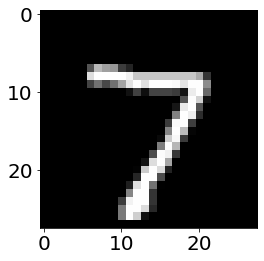

In [26]:
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
print(res[0][0])